# **Capstone Project Module 3 - Apartement Data**
#### Shofli Yazid Khoirul Roziqin
***

## **Content**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation
***

## **Business Problem Understanding**

**Context**

Kebutuhan akan tempat tinggal merupakan sebuah kebutuhan primer bagi setiap orang, disamping kebutuhan akan sandang dan pangan. Untuk masyarakat yang tinggal di daerah pedesaan yang masih memiliki ketersediaan area yang cukup luas, cenderung memilih untuk memiliki property berupa tanah dan bangunan yang mereka bangun sendiri. Hal ini berbeda dengan masyarakat urban di daerah perkotaan, yang mana ketersediaan tanah menjadi suatu hal yang langka serta memiliki harga yang cukup tinggi. Masyarakat urban cenderung memilih apartement sebagai property hunian bagi mereka. Ada banyak sekali macam, fitur, dan fasilitas yang dimiliki apartement, yang berpengaruh pada harga dari apartement tersebut. Yang pasti luas apartement menjadi salah satu yang berpengaruh, ditambah lagi kemudahan akses terhadap fasilitas umum, pusat perbelanjaan dan lain-lain juga menjadi faktor yang mempengaruhi harga dari sebuah apartement. Bagi calon pembeli apartement, pastinya akan menjadi keuntungan dan kemudahan bagi mereka jika dapat membeli apartement dengan fasilitas dan hal-hal penunjang yang memadai namun dengan harga yang sepadan. Dilain sisi, bagi penjual apartement juga akan diuntungkan dan dimudahkan dalam menjual apartement mereka dengan harga yang pas dan sesuai sehingga dapat menjual apartement lebih cepat. 

Daegu merupakan salah satu kota terbesar dan termasuk kota metropolitan yang ada di Korea Selatan, bahkan menjadi kota ke-4 yang meiliki populasi tertinggi setelah Seoul, Busan, dan Incheon, dengan jumlah populasi sebesar 2,5 juta jiwa atau sebesar 4% dari total 51,7 juta jiwa penduduk Korea Selatan (source : Wikipedia). Dengan populasi yang tinggi, kebutuhan masyarakat kota Daegu akan hunian dalam hal ini apartement juga menjadi cukup tinggi, baik itu untuk dimiliki atau untuk disewa. 

**Problem Statement**

Tantangan yang ditemui oleh demander dan supplier apartement saat akan berinteraksi dan memutuskan untuk sepakat adalah terkait dengan harga. Disatu sisi, calon pembeli/penyewa apartement tidak ingin membayar mahal sebuah apartement yang memiliki fasilitas dan fitur yang tidak memadai. Namun dilain sisi, penjual apartemen juga tidak ingin menjual apartemen yang dimilikinya terlalu rendah yang berakhir dengan kerugian. Atau mematok harga terlalu tinggi yang menyebabkan tidak lakunya apartement yang disediakan. Dengan banyaknya jumlah apartement yang tersedia di Daegu, akan banyak sekali opsi bagi pembeli, namun juga semakin banyak pesaing penyedia apartement, sehingga harga menjadi satu hal yang kritis. 

**Goals**

Berdasarkan masalah yang diuraikan tersebut, untuk mempermudah dan memfasilitasi demander dan supplier dalam mencari dan menentukan harga dari apartement, akan sangat membantu jika ada sebuah tool yang dapat menentukan harga berdasarkan fitur, fasilitas, dan penunjang penunjang yang dimiliki oleh sebuah apartemen. Sehingga masing-masing pihak dapat dimudahkan.

**Analytic Approach**

Hal pertama yang perlu dilakukan adalah menganalisis data yang tersedia dari sejumlah apartemen untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu apartemen dengan yang lainnya. 

Kemudian akan dibangun suatu model regresi yang akan membantu calon pembeli/penyewa dan penjual/penyedia untuk dapat menyediakan 'tool' prediksi harga dari sebuah apartement yang mana akan berguna untuk keperluan transaksi nantinya.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## **Data Understanding**

- Data set merupakan data harga jual apartement di kota Daegu, Korea Selatan (tidak diketahui periodisasi pengumpulan datanya)
- Setiap baris data merepresentasikan setiap property apartement beserta keterangan-keterangan pelengkap

**Attribute Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Type hallway dari apartement |
| TimeToSubway | Object | Waktu yang dibutuhtkan untuk mencapai Subway terdekat |
| SubwayStation | Object | Stasiun Subway terdekat |
| N_FacilitiesNearBy(ETC) | Float64 | Jumlah fasilitas terdekat |
| N_FacilitiesNearBy(PublicOffice) | Float64 | Jumlah fasilitas (perkantoran) terdekat |
| N_SchoolNearBy(University) | Float64 | Jumlah sekolah (setingkat universitas) terdekat |
| N_Parkinglot(Basement) | Float64 | Jumlah ketersediaan parkir di basement |
| YearBuilt | Integer | Tahun dibangunnya apartement |
| N_FacilitiesInApt | Integer | Jumlah fasilitas yang tersedia di apartement |
| Size(sqf) | Integer | Luas apartement dalam satuan squarefeet |
| SalePrice | Integer | Harga jual (dianggap dengan mata uang Won Korsel)|



In [188]:
# library yang dibutuhkan untuk eksplorasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [189]:
apart = pd.read_csv('D:\Purwadhika\Modul 3\Capstone Project Module 3\data_daegu_apartment.csv')
apart

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


## **Exploratory Data Analysis**

In [190]:
display(apart.describe(), apart.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [191]:
feature_numerikal = apart.select_dtypes(exclude='object').columns
feature_kategorikal = apart.select_dtypes(include='object').columns

In [192]:
apart_termurah = apart[apart['SalePrice'] == apart['SalePrice'].min()]
apart_termahal = apart[apart['SalePrice'] == apart['SalePrice'].max()]

In [193]:
perbandingan_harga_apart = pd.concat([apart_termurah,apart_termahal],axis = 0)
perbandingan_harga_apart.insert(0,'',['Termurah','Termahal'])
perbandingan_harga_apart.set_index('').T

,Termurah,Termahal
HallwayType,corridor,terraced
TimeToSubway,10min~15min,0-5min
SubwayStation,Myung-duk,Kyungbuk_uni_hospital
N_FacilitiesNearBy(ETC),5.0,0.0
N_FacilitiesNearBy(PublicOffice),7.0,3.0
N_SchoolNearBy(University),5.0,2.0
N_Parkinglot(Basement),0.0,1270.0
YearBuilt,1992,2007
N_FacilitiesInApt,3,10
Size(sqf),355,1928


- Berdasarkan data yang ada, apartemen dengan harga terendah yaitu dengan harga 32.743 Won dengan fasilitas sebagai berikut:
    - Hallway type : Corridor
    - Time to subway : 10 - 15 min
    - Subway station : Myung-duk
    - Nearby facilites (ETC) : 5 unit
    - Nearby public office : 7 unit
    - Nearby University : 5 unit
    - Basement parkinglot : 0 unit
    - Year build : 1992
    - Apart facilities : 3
    - Size : 355 sqf

- Sedangkan apartemen dengan harga tertinggi yaitu dengan harga 585.840 Won dengan fasilitas sebagai berikut:
    - Hallway type : Terraced
    - Time to subway : 0 - 5 min
    - Subway station : Kyungbuk uni hospital
    - Nearby facilites (ETC) : 0 unit
    - Nearby public office : 3 unit
    - Nearby University : 2 unit
    - Basement parkinglot : 1270 unit
    - Year build : 2007
    - Apart facilities : 10
    - Size : 1928 sqf

In [194]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in apart.columns :
    listItem.append( [col, apart[col].nunique(), apart[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


**Apartement Sale Price Distribution in Daegu**

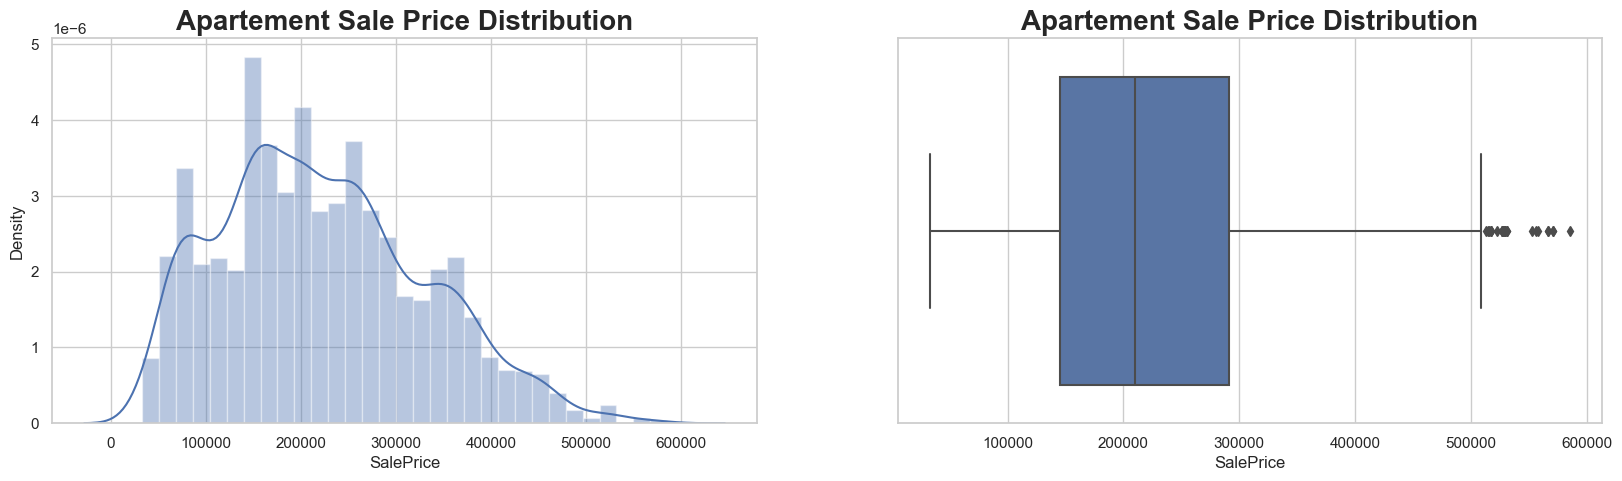

In [195]:
plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.distplot(apart['SalePrice'])
plt.title('Apartement Sale Price Distribution', size=20, weight='bold')

plt.subplot(1,2,2)
sns.boxplot(apart['SalePrice'])
plt.title('Apartement Sale Price Distribution', size=20, weight='bold')

plt.show()

In [196]:
from scipy.stats import normaltest

normal = normaltest(apart['SalePrice'])
if normal[1] <= 0.05 :
    print('Data SalePrice tidak terdistribusi normal')
else:
    print('Data SalePrice terdistribusi normal')

Data SalePrice tidak terdistribusi normal


Berdasarkan distribution plot yang dihasilkan dari harga jual apartement distribusi sedikit condong ke arah positif skewed serta kebanyakan persebaran harga berada pada nilai sekitar 150.000 hingga 300.000 Won.

In [197]:
from numpy import median

In [198]:
def count_and_median_value(aggregation):
    df = apart.groupby([aggregation]).agg({aggregation:'count','SalePrice':'median'}).rename(columns={aggregation:'Count','SalePrice':'Median_SalePrice'}).sort_values(by = [aggregation], ascending = True)
    df.insert(1,'Percentage',(df['Count']/df['Count'].sum())*100)
    df['Percentage'] = df['Percentage'].round(decimals = 2)
    
    return df

In [199]:
agg_HallwayType = count_and_median_value('HallwayType')
agg_HallwayType

,Count,Percentage,Median_SalePrice
HallwayType,,,
corridor,464,11.25,74557.0
mixed,1131,27.43,153539.0
terraced,2528,61.31,264601.0


- Berdasarkan aggregasi tipe hallway apartemen, dari 3 tipe hallway, terbanyak pada tipe 'terraced' yaitu sejumlah 2528 unit atau 61,31% dari total data apartemen. Diikuti tipe 'mixed' dengan 27,43% dan terakhir 'terraced' yaitu 11,25%.
- Dari segi harga, median dari hallway apartemen tipe 'terraced' juga menjadi yang termahal yaitu dengan nilai tengah 264.601 Won, diikuti dengan 'mixed' 153.539 Won, dan 74.557 Won untuk tipe 'corridor'

In [200]:
agg_TimeToSubway = count_and_median_value('TimeToSubway')
agg_TimeToSubway

,Count,Percentage,Median_SalePrice
TimeToSubway,,,
0-5min,1953,47.37,279646.0
10min~15min,583,14.14,159292.0
15min~20min,629,15.26,138938.0
5min~10min,787,19.09,153539.0
no_bus_stop_nearby,171,4.15,203646.0


- Berdasarkan aggregasi time to subway dari segi harga, median dari jarak waktu 0-5 min menjadi yang termahal yaitu, 279.646 Won, kemudian no bus stop nearby dengan median 203.646 Won, diikuti dengan jarak 10 min-15 min dengan median harga 159.292 Won, 5 min-10 min 153.539 Won, dan terakhir adalah jarak 15 min - 20 min dengan medain harga 138.938 Won

In [201]:
agg_SubwayStation = count_and_median_value('SubwayStation')
agg_SubwayStation

,Count,Percentage,Median_SalePrice
SubwayStation,,,
Bangoge,502,12.18,167035.0
Banwoldang,529,12.83,315929.0
Chil-sung-market,74,1.79,88495.0
Daegu,65,1.58,86725.0
Kyungbuk_uni_hospital,1152,27.94,238938.0
Myung-duk,1044,25.32,154424.5
Sin-nam,467,11.33,247787.0
no_subway_nearby,290,7.03,207743.0


- Berdasarkan aggregasi lokasi subway station terdekat dari segi harga, median harga tertinggi adalah apart yang dekat dengan 'Banwoldang' yaitu 315.929 Won, diikuti 'Sin-nam' yaitu 247.787 Won, dan 'Kyungbuk uni hospital' dengan median harga 238.938 Won. Sedangkan yang termurah adalah apart yang dekat dengan stasiun 'Daegu' dengan median harga 86.725 Won

In [202]:
agg_Near_etc_facilities = count_and_median_value('N_FacilitiesNearBy(ETC)')
agg_Near_etc_facilities

,Count,Percentage,Median_SalePrice
N_FacilitiesNearBy(ETC),,,
0.0,1828,44.34,283185.0
1.0,631,15.30,162831.0
2.0,330,8.00,200522.0
5.0,1334,32.36,155752.0


- Berdasarkan aggregasi jumlah fasilitas terdekat lainnya (ETC), dari segi median harga yang termahal adalah 0 fasilitas lainnya (ETC) dengan median harga 283.185 Won, diikuti dengan 2 fasilitas dengan median harga 200.522 Won. Sedangkan dengan 1 fasilitas terdekat lainnya (ETC) memiliki median harga yang lebih rendah yaitu 162.831 Won dan yang termurah adalah dengan 5 fasilitas yaitu seharga 155.752 Won.
- Sekilas tidak ada pola linear yang terbentuk antara harga dengan jumlah fasilitas terdekat lainnya (ETC) dari apartemen

In [203]:
agg_Near_Public_Office = count_and_median_value('N_FacilitiesNearBy(PublicOffice)')
agg_Near_Public_Office

,Count,Percentage,Median_SalePrice
N_FacilitiesNearBy(PublicOffice),,,
0.0,46,1.12,366813.5
1.0,291,7.06,296460.0
2.0,530,12.85,232743.0
3.0,844,20.47,255088.0
4.0,254,6.16,370796.0
5.0,1252,30.37,159292.0
6.0,451,10.94,155752.0
7.0,455,11.04,112389.0


- Berdasarkan aggregasi jumlah fasilitas perkantoran terdekat, median harga tertinggi adalah apart dengan fasilitas perkantoran terdekat sejumlah 0 fasilitas dengan median harga adalah 366.813,5 Won dan turun seiring bertambahnya jumlah fasilitas perkantoran terdekat. Namun, terdapat anomlai pada jumlah fasilitas perkantoran sejumlah 3 dan 4 fasilitas yang menyimpang dari pola.
- Bisa jadi ada faktor x lainnya yang mempengaruhi naiknya harga pada jumlah fasilitas perkantoran yang terdapat anomali tersebut. Hal ini yang mungkin dapat dicari pada proses-proses selanjutnya

In [204]:
agg_Near_University = count_and_median_value('N_SchoolNearBy(University)')
agg_Near_University

,Count,Percentage,Median_SalePrice
N_SchoolNearBy(University),,,
0.0,97,2.35,129203.0
1.0,833,20.20,247787.0
2.0,1359,32.96,255752.0
3.0,396,9.60,149274.0
4.0,606,14.70,158407.0
5.0,832,20.18,142477.0


- Berdasarkan aggregasi jumlah universitas terdekat, median harga tertinggi adalah apart dengan universitas sejumlah 2 fasilitas dengan median harga adalah 255.752 Won diikuti 1 universitas dengan harga 247.787 Won. Sedangkan median harga terendah adalah pada apart dengan universitas terdekat sejumlah 0 universitas
- Sekilas tidak ada pola linear yang terbentuk antara harga apartemen dengan jumlah universitas terdekat

In [205]:
agg_Amount_Parking_Lot = count_and_median_value('N_Parkinglot(Basement)')
agg_Amount_Parking_Lot

,Count,Percentage,Median_SalePrice
N_Parkinglot(Basement),,,
0.0,493,11.96,141592.0
18.0,51,1.24,87610.0
56.0,74,1.79,88495.0
76.0,51,1.24,70796.0
79.0,104,2.52,130973.0
108.0,50,1.21,101769.0
181.0,108,2.62,210619.0
184.0,139,3.37,211504.0
203.0,217,5.26,209734.0


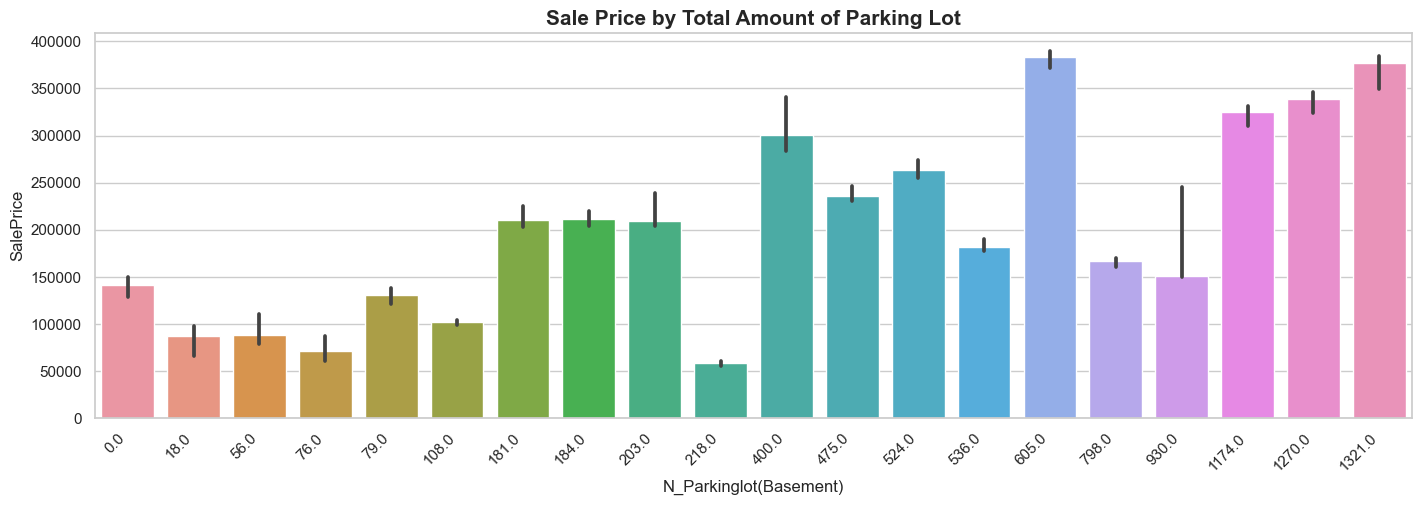

In [206]:
plt.figure(figsize=(17,5))

sns.barplot(data = apart, x='N_Parkinglot(Basement)', y='SalePrice', estimator = median)
plt.title('Sale Price by Total Amount of Parking Lot', size=15, weight='bold')
plt.xticks(rotation=45, ha='right')

plt.show()

Berdasarkan aggregasi jumlah basement parking lot adalah sebagai berikut:
- Apartemen yang tidak memiliki basement parking lot memiliki median harga 141.592 Won, bukan merupakan yang termurah.
- Sedangkan median harga termurah ada pada apartemen dengan jumlah basement parking lot sejumlah 218 unit dengan median harga 58.407 Won.
- Apartemen dengan basement parking lot terbanyak, 1321 unit, memiliki medain harga 376.769,5 Won, bukan merupakan yang termahal.
- Apartement dengan median harga termahal yaitu pada apartemen dengan jumlah basement parking lot sejumlah 605 unit, dengan harga 383.185 Won.
- Sekilas tidak ada pola linear yang terbentuk antara harga apartemen dengan jumlah basement parking lot.

In [207]:
agg_Total_Facilities_Inside = count_and_median_value('N_FacilitiesInApt')
agg_Total_Facilities_Inside

,Count,Percentage,Median_SalePrice
N_FacilitiesInApt,,,
1,41,0.99,58407.0
2,50,1.21,101769.0
3,477,11.57,88495.0
4,1001,24.28,193362.0
5,810,19.65,263544.0
7,838,20.33,165486.0
8,203,4.92,236283.0
9,159,3.86,324778.0
10,544,13.19,348672.0


Berdasarkan aggregasi jumlah fasilitas yang tersedia di apartemen, adalah sebagai berikut:
- Median harga terendah yaitu 58.407 Won dimiliki apartemen dengan jumlah fasilitas 1 macam saja dan cenderung meningkat seiring bertambahnya jumlah fasilitas.
- Namun terdapat anomali pada jumlah fasilitas 2, 5, dan 7 macam fasilitas.
- Median harga tertinggi yaitu 348.672 Won dimiliki apartemen dengan jumlah fasilitas 10 macam.
- Anomali pada pola diatas mungkin dipengaruhi juga oleh faktor x yang dapat dicari di proses-proses selanjutnya.

In [208]:
agg_Year_Built = count_and_median_value('YearBuilt')
agg_Year_Built

,Count,Percentage,Median_SalePrice
YearBuilt,,,
1978,49,1.19,163716.0
1980,4,0.10,69468.5
1985,51,1.24,70796.0
1986,273,6.62,170796.0
1992,326,7.91,82300.0
1993,451,10.94,155752.0
1997,67,1.63,85398.0
2003,7,0.17,123893.0
2005,502,12.18,167035.0


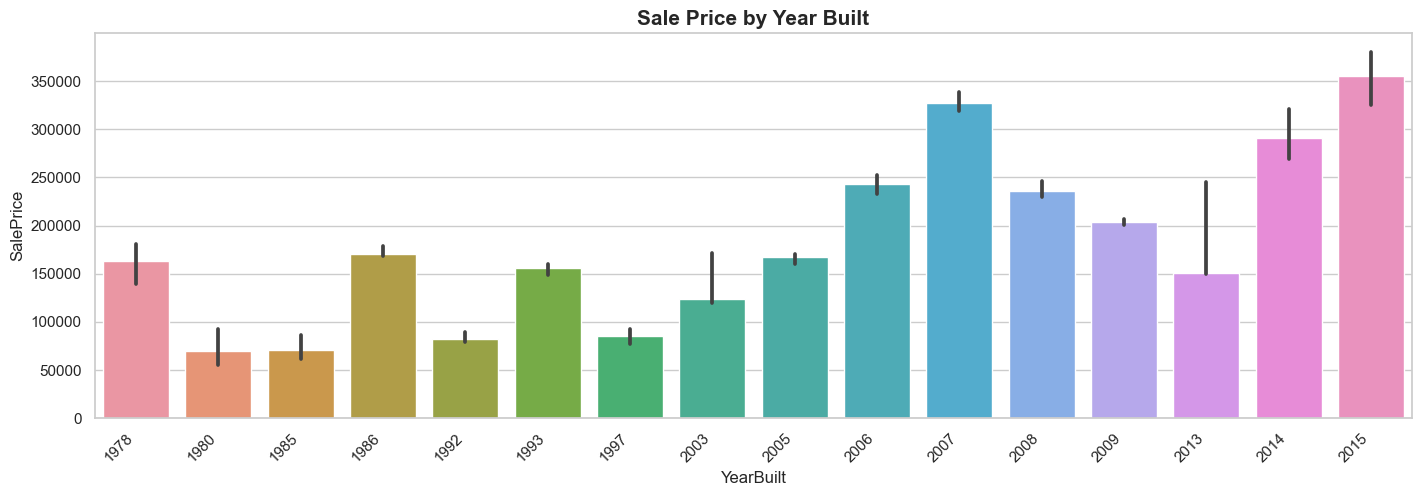

In [209]:
plt.figure(figsize=(17,5))

sns.barplot(data = apart, x='YearBuilt', y='SalePrice', estimator = median)
plt.title('Sale Price by Year Built', size=15, weight='bold')
plt.xticks(rotation=45, ha='right')

plt.show()

- Berdasarkan aggregasi tahun dibangunnya apartemen, apartemen dengan median harga terendah adalah apartemen yang dibangun pada tahun 1980 dan 1985 dengan median harga berturut-turut adalah 69.468,5 Won dan 70.796 Won
- Sedangkan apartemen dengan median harga tertinggi adalah apartemen yang dibangun pada tahun 2015 dengan median harga 355.753 Won
- Secara overall, apartemen yang dibangun diatas tahun 2005 memiliki harga yang lebih tinggi dibanding apartmen yang dibangun tahun 2005 atau sebelumnya.

In [210]:
agg_Size = count_and_median_value('Size(sqf)')
agg_Size

,Count,Percentage,Median_SalePrice
Size(sqf),,,
135,19,0.46,54424.0
138,2,0.05,55309.5
156,16,0.39,60176.0
160,1,0.02,57522.0
163,1,0.02,60176.0
...,...,...,...
1796,15,0.36,262831.0
1928,34,0.82,509734.0
2056,27,0.65,380530.0


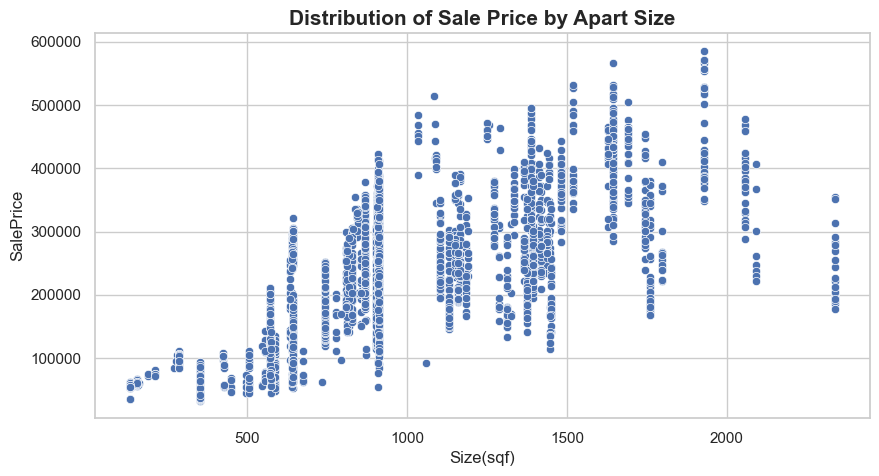

In [211]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = apart, x = 'Size(sqf)', y = 'SalePrice')
plt.title('Distribution of Sale Price by Apart Size',size=15, weight='bold')

plt.show()

In [212]:
apart['Size(sqf)'].corr(apart['SalePrice'], method = 'pearson')

0.6976854081328777

Berdasarkan hubungan korelasi antara luas apartemen dan harga, diketahui bahwa korelasi antara keduanya memiliki hubungan yang kuat yaitu sebesar 0,6976 dengan arah positif yang artinya, semakin luas apartement maka cenderung semakin mahal harganya. Namun faktor luas apartemen ini mungkin juga dipengaruhi faktor x yang menyebabkan korelasi keduanya tidak bernilai 1.

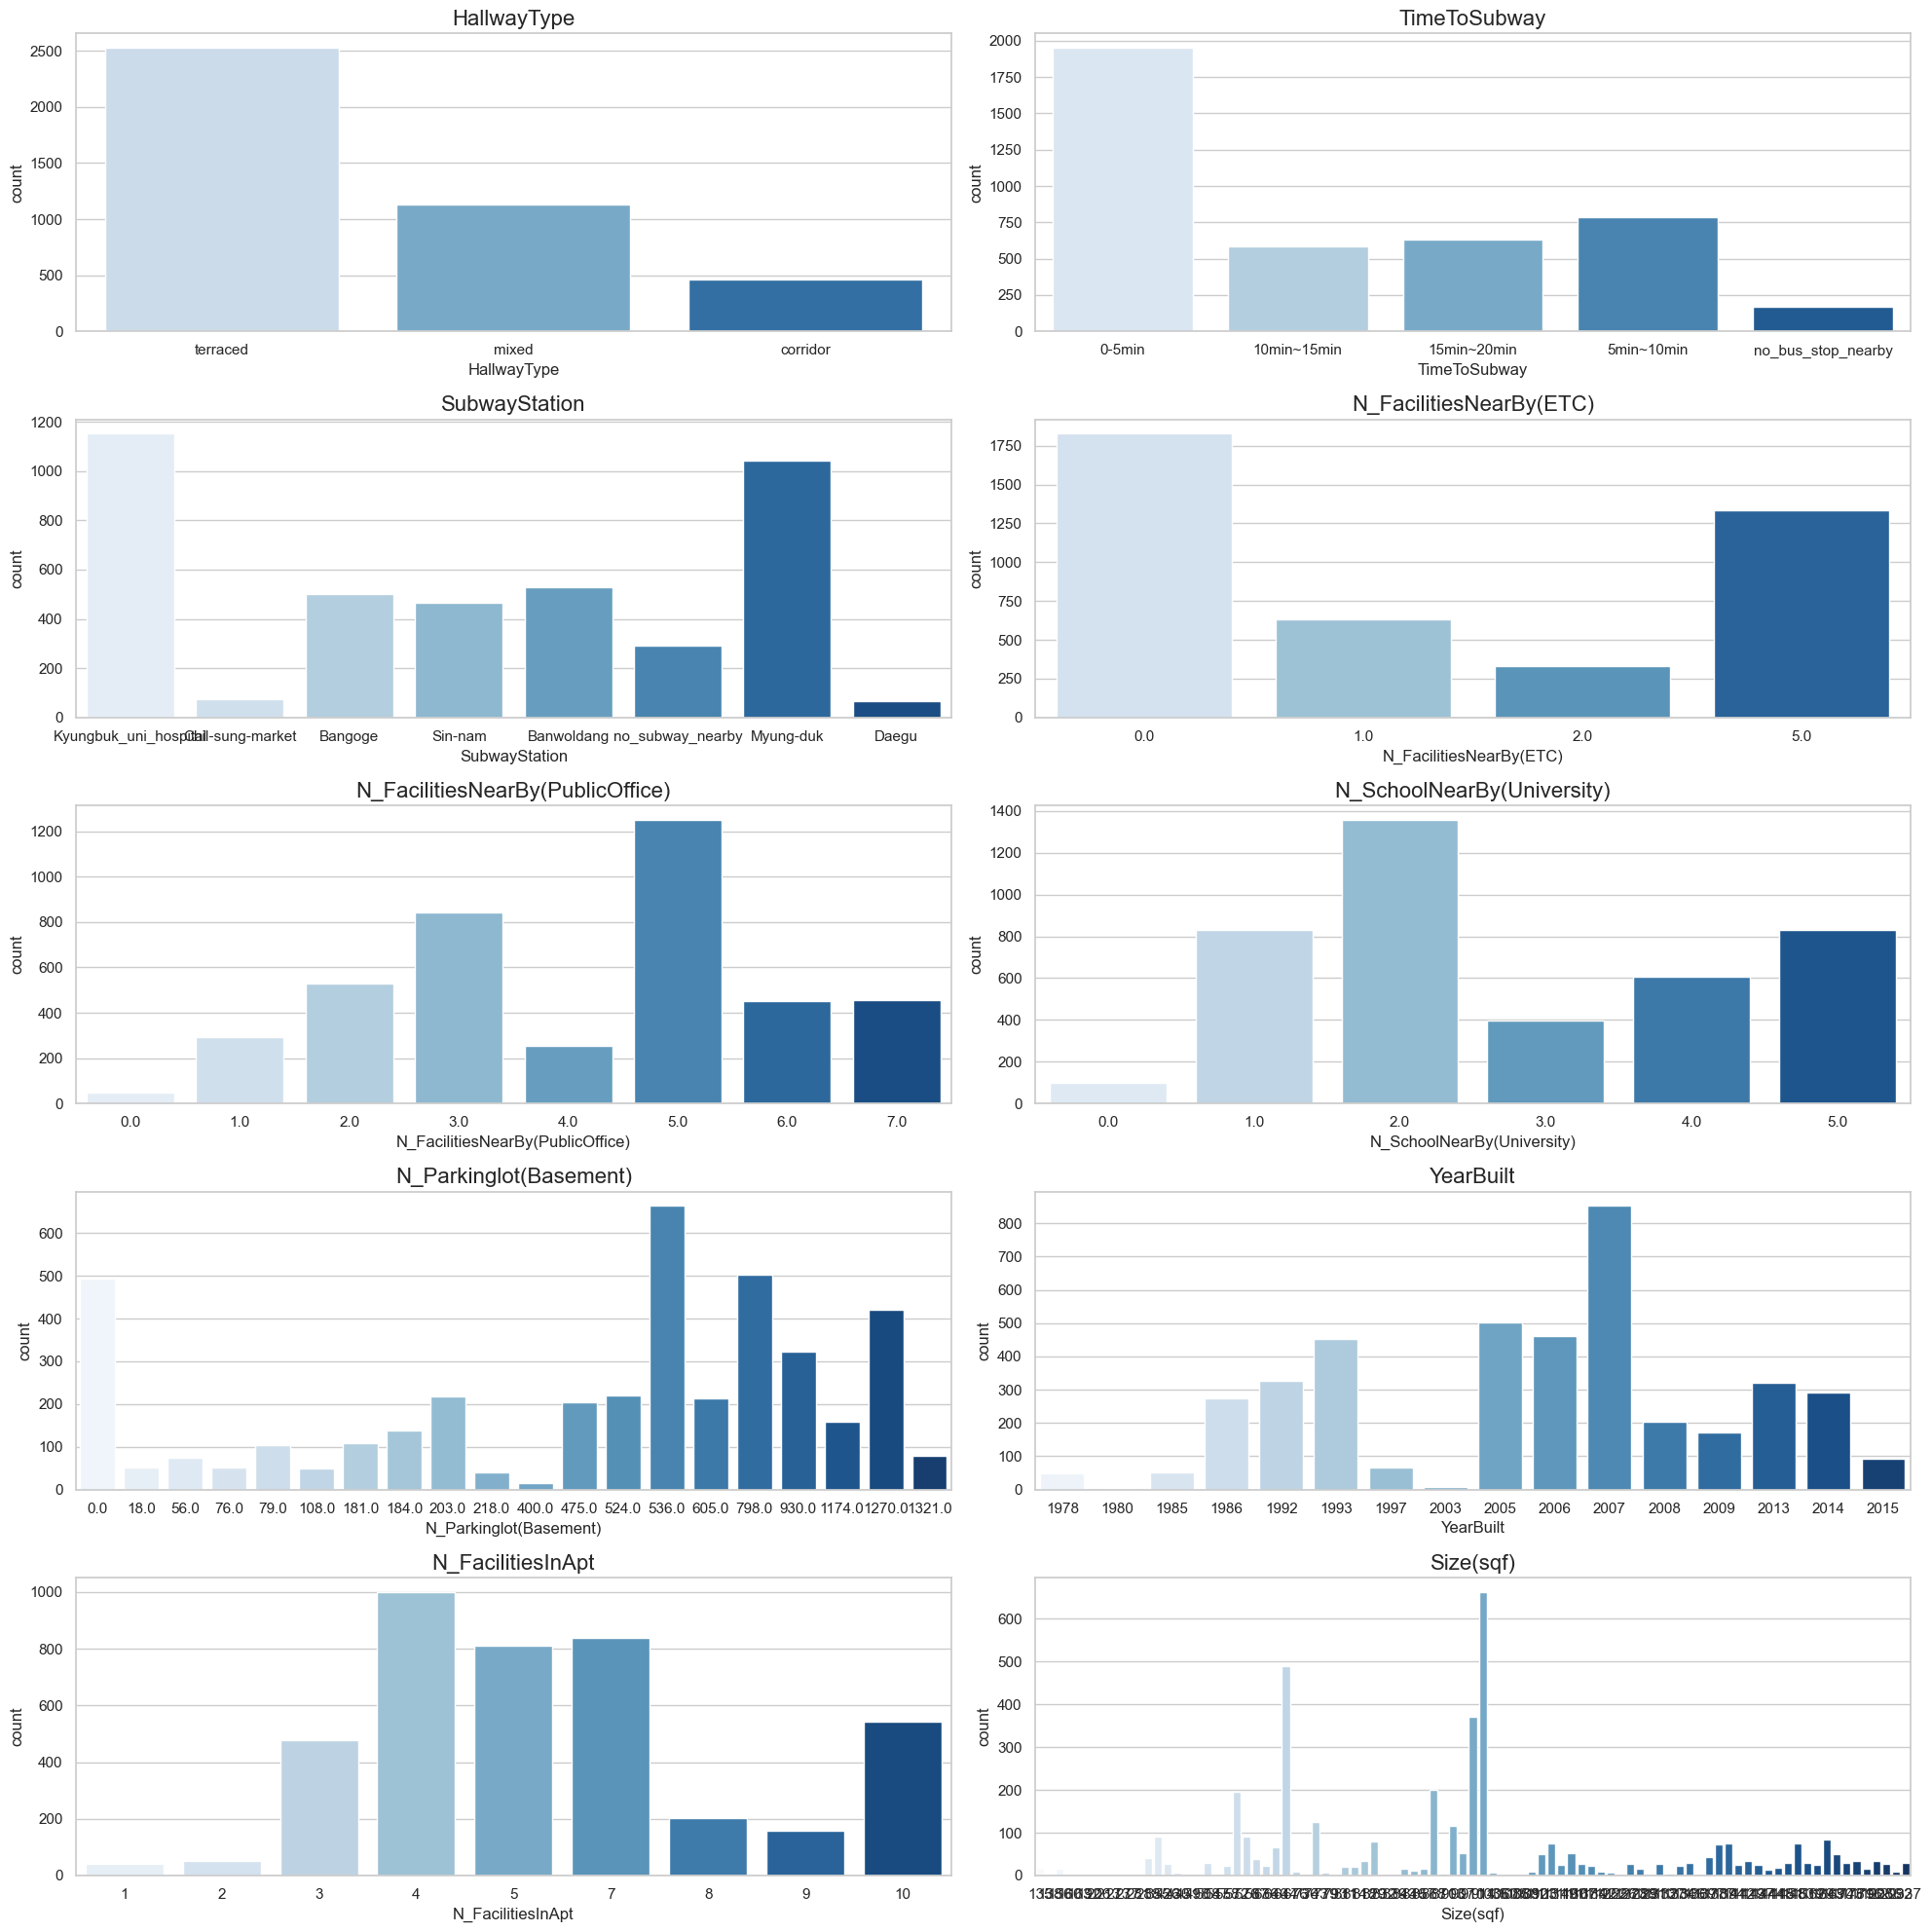

In [213]:
plt.figure(figsize=(20, 20), facecolor='white')
sns.set(style='whitegrid')
plotnumber = 1

for feature in apart.columns.drop('SalePrice'):
    ax = plt.subplot(5,2, plotnumber)
    sns.countplot(data=apart, x=feature, palette='Blues')
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Data diatas, menunjukkan distribusi dasi masing-masing fitur data apartemen di Daegu

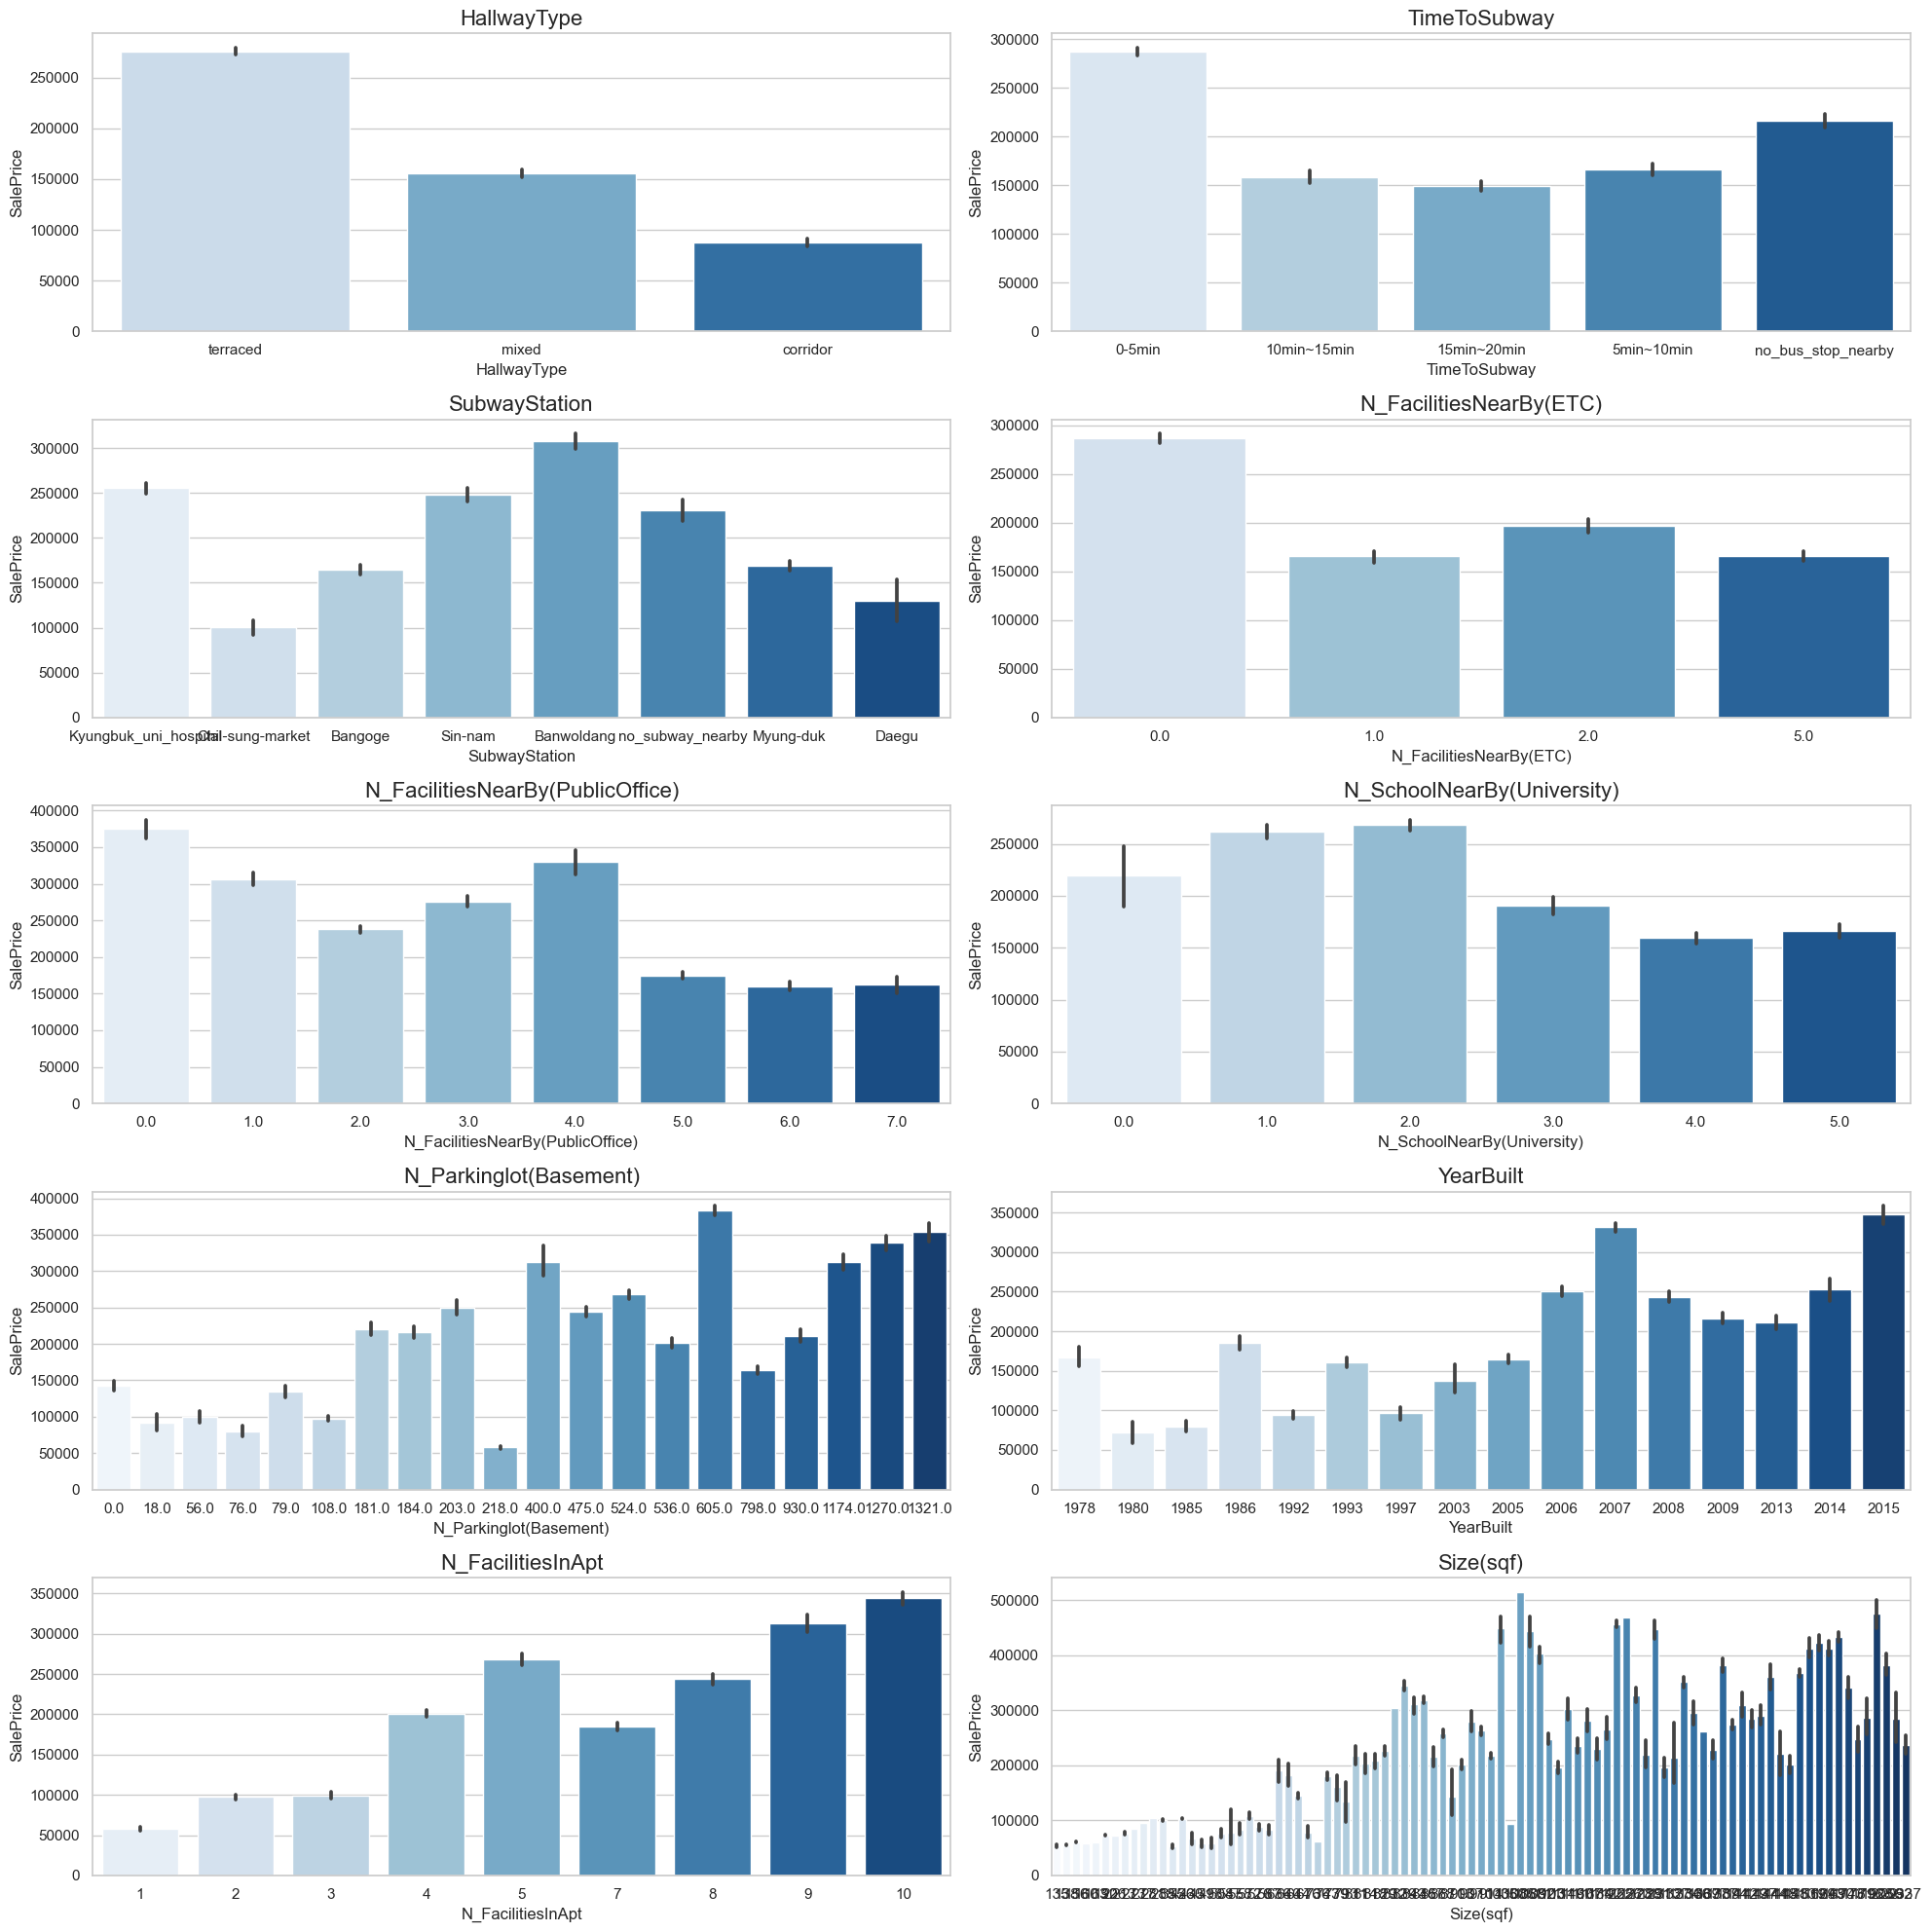

In [214]:
plt.figure(figsize=(20, 20), facecolor='white')
sns.set(style='whitegrid')
plotnumber = 1

for feature in apart.columns.drop('SalePrice'):
    ax = plt.subplot(5,2, plotnumber)
    sns.barplot(data=apart, x=feature, y='SalePrice', palette='Blues')
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Data diatas menunjukkan data masing-masing fitur jika dibandingkan dengan SalePrice

## **Data Preprocessing**

Pada tahapan ini, data akan dilakukan proses cleaning untuk mengeliminasi beberapa data yang mungkin dapat mengganggu hasil akhir atau proses analisis selanjutnya. Yang perlu dilakukan pada proses ini antara lain adalah:
- Drop fitur yang tidak relevan terkait permasalahan/target yang sedang dihadapi
- Melakukan pengecekan missing value dan memberikan perlakuan terhadap missing value yang ada
- Mencari nilai yang aneh dari data dan melakukan treatment terdapat data yang dimaksud
- Mencari outlier dan melakukan treatment terhadap outliers
- Mencari data duplikat dan melakukan treatment paaa data tersebut

In [215]:
apart_model = apart.copy()

### **Drop Columns**

In [216]:
apart_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


Berdasarkan data dari masing-masing kolom, dari 11 kolom yang ada tidak ada data yang tidak relevan dalam penentuan harga. Masing-masing kolom memiliki data penunjang yang dapat mempenguaruhi Sale Price dari sebuah apartemen. Maka dari itu tidak ada kolom yang akan di drop pada proses ini.

### **Missing Values**

In [217]:
apart_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [218]:
apart_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Berdasarkan informasi di atas tidak ditemukan adanya missing value dari data, sehingga proses treatment terhadap missing value tidak perlu dilakukan.

### **Identify Strange Values**

In [219]:
display(apart_model.describe(), apart_model.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


Berdasarkan data diatas tidak ditemukan adanya data mencurigakan yang harus diberlakukan treatment, sebagai contoh data aneh adalah adanya nilai minus dari masing-masing fitur. 

Untuk nilai 0 pada fitur N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), dan N_Parkinglot(Basement) artinya adalah tidak adanya fitur yang dimaksud. Sebagai contoh: N_FacilitiesNearBy(PublicOffice) bernilai 0 artinya tidak adanya fasilitas Public Office terdekat yang berlokasi dekat dengan apartemen, dengan range jarak tertentu. Pada data ini tidak diketahui range jarak berapa yang dihitung sebagai poin, hal ini dapat diabaikan selama kolektor data memberlakukan range jarak yang seragam pada masing-masing row data.

Maka dari itu tidak ada perubahan data yang dipengaruhi oleh data aneh

### **Data Correlation**

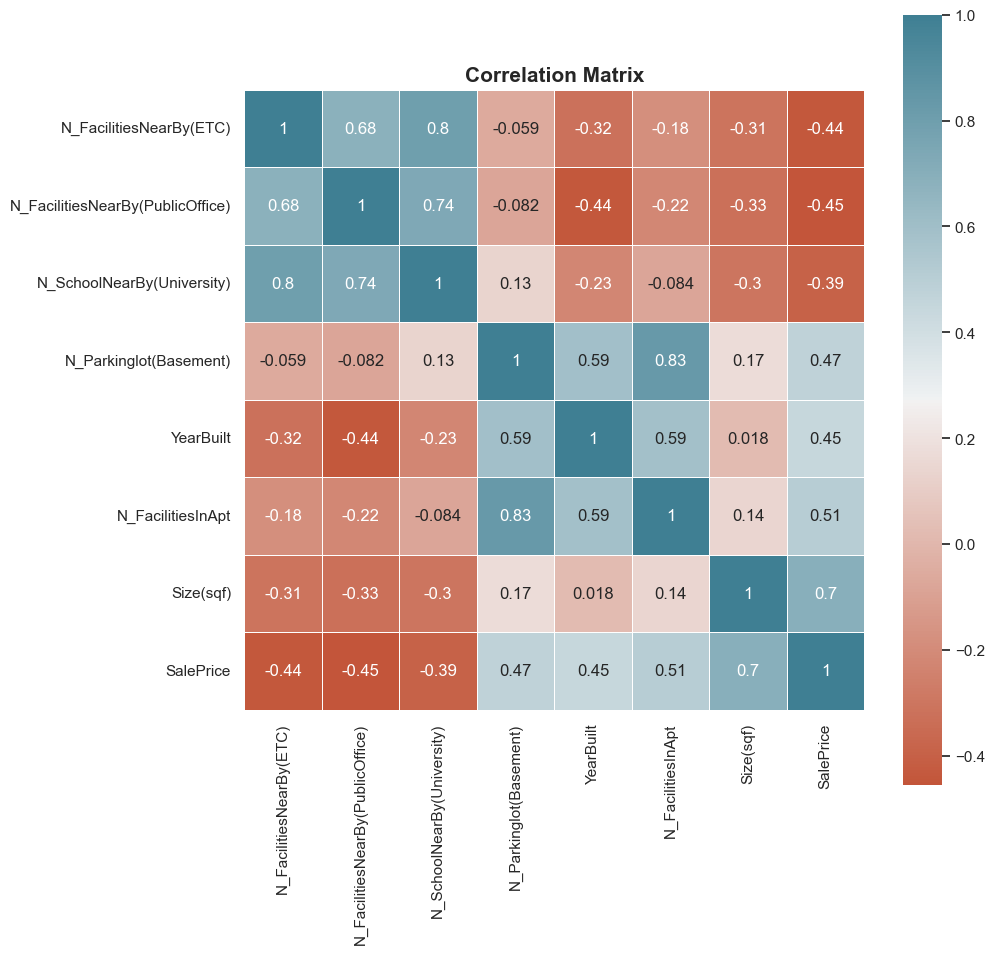

In [220]:
plt.figure(figsize=(10,10))
palette = sns.diverging_palette(20, 220, n=256)
corr = apart_model.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Berdasarkan heatmap korelasi dengan metode Pearson di atas, dapat diambil informasi sebagai berikut:
- Korelasi antara Size(sqf) apartement dengan Sale Price memiliki hubungan yang kuat yaitu 0,7 dengan arah positif. Artinya, semakin luas apartemen akan semakin tinggi harga jual
- Korelasi antara N_FacilitiesInApt atau jumlah fasilitas yang tersedia di dalam apartemen dengan Sale Price juga memiliki hubungan yang kuat walaupun tidak sekuat Size(sqf) yaitu 0,51 dengan arah yang positif. Artinya, semakin banyak jumlah fasilitas di dalam apartemen maka harga juga akan meningkat
- Korelasi antara N_Parkinglot dan YearBuilt terhadap Sale Price memiliki hubungan yang cukup dengan nilai dibawah 0,5 namun diatas 0,25 dengan arah positif
- Korelasi antara N_FacilitiesNeaBy(ETC), N_FacilitesNearBy(PublicOffice), dan N_SchoolNearBy(University) terhadap Sale Price memiliki hubungan yang cukup dengan nilai dibawah 0,5 namun diatas 0,25 dengan arah negatif

### **Outliers Detection**

<AxesSubplot:>

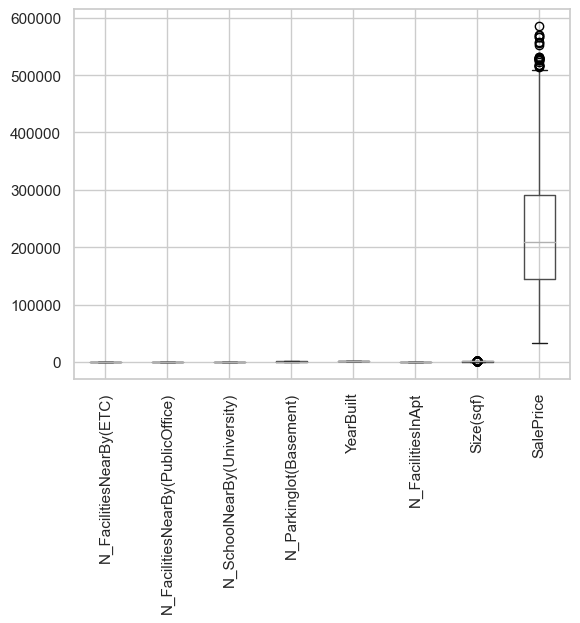

In [221]:
apart_model.boxplot(rot=90)

Ditemukan adanya beberapa outliers pada fitur Size(sqf) dan SalePrice. Selanjutnya akan dilakukan treatment terhadap data outliers tersebut

In [222]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [223]:
find_anomalies(apart_model['Size(sqf)'])

IQR: 505.0
limit_bawah: -113.5
limit_atas: 1906.5


In [224]:
find_anomalies(apart_model['SalePrice'])

IQR: 146398.0
limit_bawah: -74845.0
limit_atas: 510747.0


**Size(sqf)**

In [225]:
apart_model['Size(sqf)'].describe()

count    4123.000000
mean      954.630851
std       383.805648
min       135.000000
25%       644.000000
50%       910.000000
75%      1149.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [226]:
apart_model[apart_model['Size(sqf)'] > 1906.5].count()['Size(sqf)']

98

Diketahui bahwa Q3 dari data Size(sqf) adalah 1149 dan limit atas dari kolom tersebut adalah 1906,5 dan terdapat 98 data yang terletak diluar dari limit atas data. 98 data ini yang nantinya tidak akan dimasukkan ke dalam pemodelan dan menjadi limitasi dari model yang nantinya akan dibangun.

In [227]:
apart_model = apart_model[(apart_model['Size(sqf)'] <= 1906.5)]

**SalePrice**

In [228]:
apart_model['SalePrice'].describe()

count      4025.000000
mean     218321.122236
std      104148.533300
min       32743.000000
25%      143389.000000
50%      207079.000000
75%      286902.000000
max      566371.000000
Name: SalePrice, dtype: float64

In [229]:
apart_model[apart_model['SalePrice'] > 510747].count()['SalePrice']

10

Diketahui bahwa Q3 dari data SalePrice adalah 286902 dan limit atas dari kolom tersebut adalah 510747 dan terdapat 10 data yang terletak diluar dari limit atas data. 10 data ini yang nantinya tidak akan dimasukkan ke dalam pemodelan dan menjadi limitasi dari model yang nantinya akan dibangun.

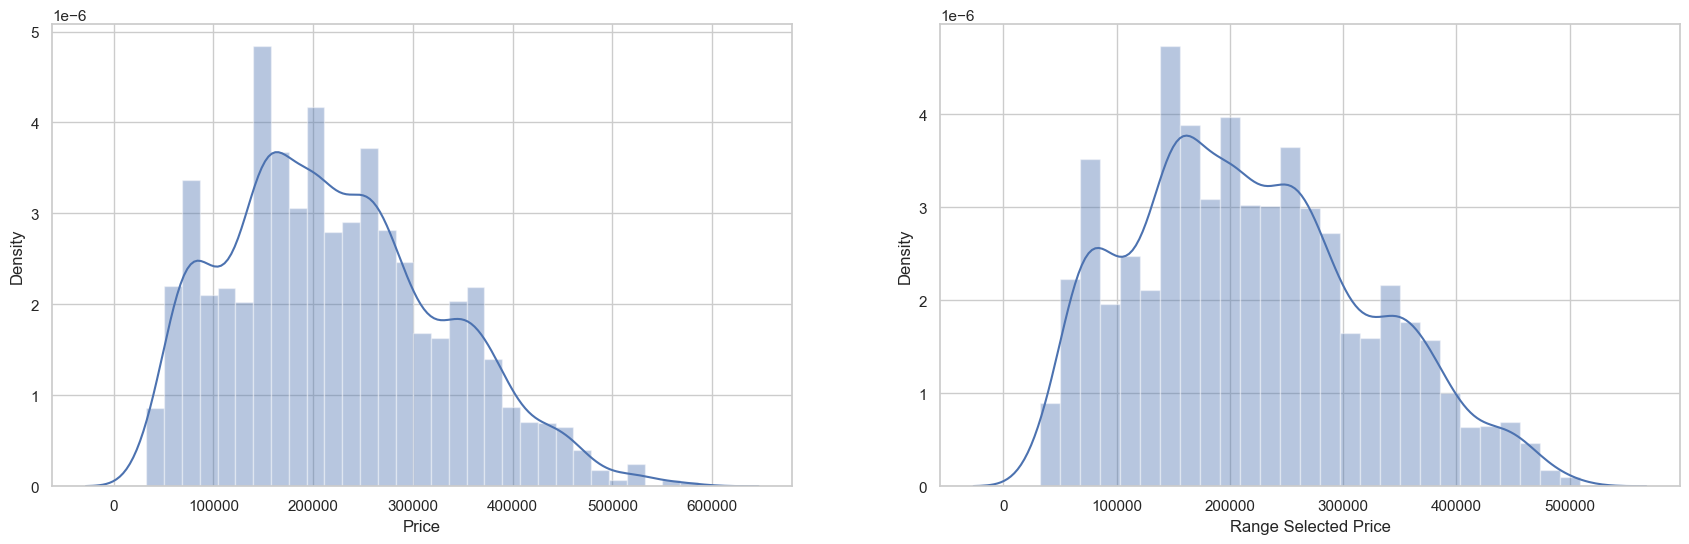

In [230]:
# Melakukan filtering pada data
apart_model = apart_model[(apart_model['SalePrice'] <= 510747)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(apart['SalePrice'], ax=axes[0])
sns.distplot(apart_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')

plt.show()

In [231]:
apart_model.describe()[['Size(sqf)', 'SalePrice']]


,Size(sqf),SalePrice
count,4015.000000,4015.000000
mean,925.216936,217551.669988
std,341.828592,103126.367493
min,135.000000,32743.000000
25%,644.000000,143362.000000
50%,910.000000,207079.000000
75%,1131.000000,285840.000000
max,1796.000000,508849.000000


### **Data Duplication**

In [232]:
apart_model.duplicated().sum()

1408

Sejumlah 1408 data dari dataframe terdeteksi sebagai data duplikat

In [233]:
apart_model.duplicated().sum()/len(apart_model.index)*100

35.06849315068493

1408 data merupakan 35,06% dari total jumlah data. Jumlah yang cukup besar untuk dieliminasi. 
Selanjutnya akan coba diidentifikasi contoh dari data yang teridentifikasi sebagai data yang terduplikat

In [234]:
apart.sort_values('SalePrice', ascending=False).head(41)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840
2918,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
3545,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,557522
3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637
549,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,553097
2100,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,530973
1180,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,530973


In [235]:
apart.sort_values('SalePrice', ascending=True).head(41)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
1908,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,32743
3625,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34070
804,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
163,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
1210,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
2262,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
1068,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
647,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
3961,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840
898,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840


Dua dataframe di atas menunjukkan sekitar 1% data dengan Sale Price tertinggi dan 1% data Sale Price terendah. Dari 2 dataframe tersebut dapat dilihat bahwa banyak data yang seakan-akan merupakan duplikat, namun persamaan data dari masing-masing row bisa jadi merupakan data masing-masing apartment dalam gedung yang sama, dengan tipe ruangan yang sama, namun berbeda nomor kamar/apartment, sehingga memiliki ciri-ciri yang sama dan harga yang sama pula.
Jadi data-data tersebut diputuskan tidak dianggap sebagai duplikasi.

### **Clean Dataset**

In [236]:
apart_model

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [237]:
apart_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4015 non-null   object 
 1   TimeToSubway                      4015 non-null   object 
 2   SubwayStation                     4015 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4015 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4015 non-null   float64
 5   N_SchoolNearBy(University)        4015 non-null   float64
 6   N_Parkinglot(Basement)            4015 non-null   float64
 7   YearBuilt                         4015 non-null   int64  
 8   N_FacilitiesInApt                 4015 non-null   int64  
 9   Size(sqf)                         4015 non-null   int64  
 10  SalePrice                         4015 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 376.4+ KB


In [238]:
len(apart_model.index)/len(apart.index)*100

97.38054814455494

Pada akhirnya tersisa 4015 data dari 4132 data atau setara 97,38% data yang dianggap sebagai data bersih dan akan digunakan untuk proses pemodelan.

In [239]:
display(apart.describe(), apart.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


## **Modelling**

### **Library**

In [240]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### **Encoding**

In [241]:
ordinal_mapping = [
    {'col':'TimeToSubway', 'mapping':{'no_bus_stop_nearby':0, '0-5min':1, '5min~10min':2, '10min~15min':3, '15min~20min':4} }
]

Ordinal_Encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(), ['HallwayType']),
    ('Binary', ce.BinaryEncoder(), ['SubwayStation']),
    ('Ordinal', Ordinal_Encoder, ['TimeToSubway'])
], remainder='passthrough')

Encoding dilakukan untuk mengubah tipe data kategorikal menjadi tipe data numerikal, sehingga fitur fitur kategorikal dapat dibaca dan digunakan dalam pemodelan. Pada kasus berikut dilakukan 3 macam encoding yaitu antara lain:
- Onehot encoder, diterapkan pada kolom 'HallwayType' yang berisikan 3 kategori yang merupakan kategori nominal
- Binary encoder, diterapkan pada kolom 'SubwayStation' yang berisikan 8 kategori (>5) yang merupakan kategori nominal
- Ordinal encoder, diterapkan pada kolom 'TimeToSubway' yang berisikan 5 kategori tapi merupakan kategori ordinal (dapat diurutkan) dengan urutan sbb:
    1. no_bus_stop_nearby 
    2. 0-5 min
    3. 5min-10min
    4. 10min-15min
    5. 15min-20min

### **Data Splitting**

In [242]:
# Memisahkan data independen variabel dengan target
X = apart_model.drop(['SalePrice'], axis = 1)
y = apart_model['SalePrice']

### **Train and Test Splitting**

In [243]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 1
)

In [244]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
gb = GradientBoostingRegressor(random_state=1)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, gb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-50096.72791815 -52084.90436923 -49237.45534145 -49615.04516312
 -49015.27828984] LinearRegression()
[-41693.53826871 -42421.29781703 -41259.68896961 -40490.67142651
 -40917.97712833] LinearRegression()
[-0.23518578 -0.23563185 -0.22952576 -0.22738918 -0.23575204] LinearRegression()
[-43789.42141378 -49537.11934453 -44409.30506733 -45082.45253242
 -46989.06111455] KNeighborsRegressor()
[-34298.40462633 -36836.70320285 -34581.8519573  -35242.37651246
 -36441.23131673] KNeighborsRegressor()
[-0.19586819 -0.19512497 -0.19013088 -0.19098254 -0.20255051] KNeighborsRegressor()
[-40716.03432348 -44204.05183384 -42791.28697266 -42634.67980772
 -42307.80759216] DecisionTreeRegressor(random_state=1)
[-32079.37961699 -34279.47515471 -34164.39827918 -34300.38543508
 -33503.39960266] DecisionTreeRegressor(random_state=1)
[-0.17879268 -0.18182212 -0.18806841 -0.19138155 -0.18547339] DecisionTreeRegressor(random_state=1)
[-40656.22526052 -44433.64898731 -42865.74854159 -42685.69968294
 -42301.234485

In [245]:
# Evaluasi hasil dari 6 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'GradientBoosting Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-50009.882216,1100.457692,-41356.634722,663.132400,-0.232697,0.003532
1,KNN Regressor,-45961.471895,2085.228740,-35480.113523,1002.388310,-0.194931,0.004418
2,DecisionTree Regressor,-42530.772106,1115.483415,-33665.407618,845.103410,-0.185108,0.004448
3,RandomForest Regressor,-42588.511392,1208.891762,-33742.257718,908.228718,-0.185882,0.004443
4,XGBoost Regressor,-42526.240449,1117.937421,-33662.197527,850.614461,-0.185116,0.004472
5,GradientBoosting Regressor,-42339.721530,1161.908157,-33790.856680,946.146112,-0.186374,0.005351


Berdasarkan 6 model diatas terdapat perbedaan antara nilai RMSE dan MAE, dimana nilai RMSE lebih tinggi karena residuals atau errornya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.
- Berdasarkan nilai RMSE, GradientBoosting Regressor adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE RandomForest memiliki nilai paling rendah.
- Selanjutnya, dilakukan prediksi pada test set dengan 4 model terbaik.

In [246]:
# Benchmark 4 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=1),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state = 1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,41178.115212,32461.823950,0.178130
RandomForest,41294.169669,32594.082292,0.179353
DecisionTreeRegressor,41189.235655,32469.818313,0.178098
GradientBoostingRegressor,41196.125515,32828.072737,0.181388


### **Hyperparameter Tuning**

Selanjutnya dilakukan hyperparameter tuning untuk ke-4 model tersebut untuk melihat perubahan nilai metric dan untuk menetukan model mana yang paling baik.

**XGBoost**

In [247]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [248]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [249]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'mapping': {'0-5m...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [250]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
cv_result_xgb = pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()
cv_result_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,1.499940,0.037000,0.050371,0.006403,0.6,0.001,190,5,0.04,9,...,886.501332,2,-0.177176,-0.182577,-0.188289,-0.192012,-0.183764,-0.184764,0.005066,2
23,0.691403,0.016365,0.043374,0.001355,0.9,3.593814,153,4,0.33,9,...,889.505440,5,-0.177131,-0.181678,-0.188381,-0.192093,-0.184746,-0.184806,0.005188,3
42,0.759164,0.031009,0.048373,0.004879,0.3,3.593814,118,6,0.18,6,...,877.748735,3,-0.179225,-0.182923,-0.188082,-0.191127,-0.187501,-0.185772,0.004195,14
24,0.717787,0.022172,0.052171,0.007273,0.9,10.0,146,4,0.06,5,...,933.980870,17,-0.178348,-0.186707,-0.190657,-0.195066,-0.187069,-0.187569,0.005509,34
16,0.690603,0.027151,0.051171,0.009781,0.8,0.16681,190,3,0.48,9,...,954.737307,6,-0.175811,-0.182332,-0.189024,-0.192607,-0.184867,-0.184928,0.005755,4


In [251]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -42375.08798337219
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Decision Tree**

In [252]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah feature untuk tiap splitting
max_features = list(np.arange(1, 6))

# Jumlah sample sebelum splitting
min_samples_split = list(np.arange(2, 20))

# Jumlah sample sesudah splitting
min_samples_leaf = list(np.arange(2, 10))

# hyperparameter space Decision Tree
hyperparam_space_dt = {
    'model__max_depth': max_depth,            
    'model__max_features': max_features,          
    'model__min_samples_split': min_samples_split,    
    'model__min_samples_leaf' : min_samples_leaf     
}

In [253]:
# Model 2 dengan hyperparameter tuning
dt = DecisionTreeRegressor(random_state=0)

# Membuat algorithm chains
estimator_dt = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', dt)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_dt = RandomizedSearchCV(
    estimator_dt,
    param_distributions = hyperparam_space_dt,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [254]:
# Fitting data training untuk mencari parameter terbaik
random_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'mapping': {'0-5m...
                   param_distributions={'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__max_features': [1, 2, 3, 4, 5],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6, 7, 8,
                                                                    9],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [255]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
cv_result_dt = pd.DataFrame(random_dt.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()
cv_result_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
42,0.112535,0.007732,0.031982,0.002682,19,2,5,9,"{'model__min_samples_split': 19, 'model__min_samples_leaf': 2, 'model__max_features': 5, 'model__max_depth': 9}",-42442.162022,...,470.940329,2,-0.185997,-0.187480,-0.188277,-0.192525,-0.184102,-0.187676,0.002811,1
45,0.122331,0.017039,0.037978,0.003284,5,2,3,10,"{'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': 3, 'model__max_depth': 10}",-42322.909019,...,640.248683,1,-0.187982,-0.184149,-0.188579,-0.192776,-0.184943,-0.187686,0.003060,2
43,0.116733,0.011524,0.051170,0.014924,4,5,3,8,"{'model__min_samples_split': 4, 'model__min_samples_leaf': 5, 'model__max_features': 3, 'model__max_depth': 8}",-43045.352604,...,820.273084,3,-0.190296,-0.183475,-0.187472,-0.193345,-0.186993,-0.188316,0.003320,3
32,0.113335,0.006082,0.041577,0.009599,5,7,4,9,"{'model__min_samples_split': 5, 'model__min_samples_leaf': 7, 'model__max_features': 4, 'model__max_depth': 9}",-42187.520765,...,634.037699,5,-0.185930,-0.199525,-0.190003,-0.190405,-0.189015,-0.190976,0.004553,9
7,0.155710,0.012929,0.046773,0.006238,18,2,1,8,"{'model__min_samples_split': 18, 'model__min_samples_leaf': 2, 'model__max_features': 1, 'model__max_depth': 8}",-43651.204527,...,1088.216006,4,-0.191140,-0.184050,-0.186864,-0.201685,-0.185526,-0.189853,0.006372,6


In [256]:
# Cek skor dan params terbaik
print('DecisionTree')
print('Best_score:', random_dt.best_score_)
print('Best_params:', random_dt.best_params_)

DecisionTree
Best_score: -43089.825234861426
Best_params: {'model__min_samples_split': 19, 'model__min_samples_leaf': 2, 'model__max_features': 5, 'model__max_depth': 9}


**Random Forest**

In [257]:
# Jumlah pohon pada random forest
n_estimators = list(np.arange(100, 201))

# Jumlah fitur yang perlu dipertimbangkan di setiap split
max_features = list(np.arange(2, 11))

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah minimum sampel yang diperlukan untuk split sebuah node
min_samples_split = list(np.arange(2, 21))

# Jumlah minimum sampel yang diperlukan pada setiap leaf
min_samples_leaf = list(np.arange(1, 21))


hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
}

In [258]:
# Model 3 dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=0)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 1
)

In [259]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'mapping': {'0-5m...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [260]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
cv_result_rf = pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()
cv_result_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
16,0.929096,0.030228,0.081553,0.010645,106,8,1,7,8,"{'model__n_estimators': 106, 'model__min_samples_split': 8, 'model__min_samples_leaf': 1, 'model__max_features': 7, 'model__max_depth': 8}",...,596.749231,1,-0.184934,-0.184214,-0.187871,-0.190394,-0.185387,-0.186560,0.002278,1
69,1.104765,0.060013,0.106539,0.010321,151,16,1,2,9,"{'model__n_estimators': 151, 'model__min_samples_split': 16, 'model__min_samples_leaf': 1, 'model__max_features': 2, 'model__max_depth': 9}",...,611.866499,2,-0.185433,-0.184696,-0.188860,-0.189937,-0.185661,-0.186917,0.002079,2
59,1.521926,0.014140,0.121930,0.005964,192,13,1,6,7,"{'model__n_estimators': 192, 'model__min_samples_split': 13, 'model__min_samples_leaf': 1, 'model__max_features': 6, 'model__max_depth': 7}",...,594.751462,3,-0.186561,-0.186757,-0.188802,-0.192763,-0.186847,-0.188346,0.002353,6
92,1.656849,0.096748,0.110736,0.015411,155,19,6,9,8,"{'model__n_estimators': 155, 'model__min_samples_split': 19, 'model__min_samples_leaf': 6, 'model__max_features': 9, 'model__max_depth': 8}",...,654.341817,4,-0.187771,-0.185168,-0.187002,-0.193608,-0.186017,-0.187913,0.002980,3
75,0.989832,0.019210,0.089349,0.007679,107,8,6,9,8,"{'model__n_estimators': 107, 'model__min_samples_split': 8, 'model__min_samples_leaf': 6, 'model__max_features': 9, 'model__max_depth': 8}",...,607.713065,5,-0.188715,-0.185093,-0.186732,-0.193399,-0.186451,-0.188078,0.002901,4


In [261]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest
Best_score: -42758.50782980294
Best_params: {'model__n_estimators': 106, 'model__min_samples_split': 8, 'model__min_samples_leaf': 1, 'model__max_features': 7, 'model__max_depth': 8}


**Gradient Boost**

In [262]:
# Kedalaman pohon
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(1,100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100,201))

# Jumlah set train di setiap pohon (% of total number of train set rows)
subsample = list(np.arange(2,10)/10)

# Jumlah fitur yang digunakan untuk splitting (% of total number of train set columns)
max_features = list(np.arange(1,10)/10)

# Hyperparameter space Gradient Boost
hyperparam_space_gb = {
    'model__max_depth':max_depth ,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [263]:
# Model 3 dengan hyperparameter tuning
gb = GradientBoostingRegressor(random_state=0)

# Membuat algorithm chains
estimator_gb = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', gb)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_gb = RandomizedSearchCV(
    estimator_gb,
    param_distributions = hyperparam_space_gb,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 1
)

In [264]:
# Fitting data training untuk mencari parameter terbaik
random_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'mapping': {'0-5m...
                                        'model__max_features': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8, 0.9],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error'])

In [265]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
cv_result_gb = pd.DataFrame(random_gb.cv_results_).head()
cv_result_gb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.580066,0.073856,0.050771,0.023485,0.7,143,0.4,1,0.67,"{'model__subsample': 0.7, 'model__n_estimators': 143, 'model__max_features': 0.4, 'model__max_depth': 1, 'model__learning_rate': 0.67}",-44972.776353,-44567.756248,-44791.895899,-47391.173903,-45465.823689,-45437.885219,1020.477352,94
1,1.266074,0.174781,0.051970,0.008644,0.5,158,0.4,6,0.72,"{'model__subsample': 0.5, 'model__n_estimators': 158, 'model__max_features': 0.4, 'model__max_depth': 6, 'model__learning_rate': 0.72}",-42339.213649,-42632.677935,-44695.377183,-44409.999791,-43686.862075,-43552.826127,935.699010,68
2,0.714990,0.023453,0.046373,0.007441,0.2,197,0.4,2,0.61,"{'model__subsample': 0.2, 'model__n_estimators': 197, 'model__max_features': 0.4, 'model__max_depth': 2, 'model__learning_rate': 0.61}",-42786.325360,-43662.795830,-45205.749204,-43532.311747,-43477.521891,-43732.940806,796.951258,75
3,1.315044,0.025145,0.048972,0.008119,0.9,200,0.5,5,0.08,"{'model__subsample': 0.9, 'model__n_estimators': 200, 'model__max_features': 0.5, 'model__max_depth': 5, 'model__learning_rate': 0.08}",-41641.628304,-42386.970733,-44177.452829,-43364.123769,-42733.744277,-42860.783982,861.852243,16
4,0.814333,0.033563,0.049971,0.007372,0.3,123,0.8,8,0.77,"{'model__subsample': 0.3, 'model__n_estimators': 123, 'model__max_features': 0.8, 'model__max_depth': 8, 'model__learning_rate': 0.77}",-42003.039743,-44789.194754,-45380.197253,-45904.943587,-43487.485648,-44312.972197,1408.356925,82


In [266]:
# Cek skor dan params terbaik
print('GradientBoosting Regressor')
print('Best_score:', random_gb.best_score_)
print('Best_params:', random_gb.best_params_)

GradientBoosting Regressor
Best_score: -42546.927173480944
Best_params: {'model__subsample': 0.4, 'model__n_estimators': 188, 'model__max_features': 0.7, 'model__max_depth': 3, 'model__learning_rate': 0.08}


## **Model Performance in Test Set**

**Before Hyperparameter Tuning**

In [267]:
# Benchmark 4 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=1),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state = 1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,41178.115212,32461.823950,0.178130
RandomForest,41294.169669,32594.082292,0.179353
DecisionTreeRegressor,41189.235655,32469.818313,0.178098
GradientBoostingRegressor,41196.125515,32828.072737,0.181388


In [268]:
xgb_tuning = random_xgb.best_estimator_
rf_tuning = random_rf.best_estimator_
dt_tuning = random_dt.best_estimator_
gb_tuning = random_gb.best_estimator_

# Benchmark 4 model terbaik
models = {
    xgb_tuning,
    rf_tuning,
    dt_tuning,
    gb_tuning
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_after_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=['XGB','RandomForest','DecisionTreeRegressor','GradientBoostingRegressor'])
score_after_tuning

,RMSE,MAE,MAPE
XGB,41269.724353,32527.547478,0.179594
RandomForest,41103.038553,32701.853100,0.181185
DecisionTreeRegressor,41165.679973,32546.306457,0.179559
GradientBoostingRegressor,41210.124840,32477.025408,0.178518


**RMSE Comparation**

In [269]:
rsme_compare = pd.DataFrame({
    'Model' : ['XGB','RandomForest','DecisionTreeRegressor','GradientBoostingRegressor'],
    'RSME BEFORE Tuning' : [score_before_tuning.loc['XGB']['RMSE'],
                            score_before_tuning.loc['RandomForest']['RMSE'],
                            score_before_tuning.loc['DecisionTreeRegressor']['RMSE'],
                            score_before_tuning.loc['GradientBoostingRegressor']['RMSE']],
    'RSME AFTER Tuning' : [score_after_tuning.loc['XGB']['RMSE'],
                           score_after_tuning.loc['RandomForest']['RMSE'],
                           score_after_tuning.loc['DecisionTreeRegressor']['RMSE'],
                           score_after_tuning.loc['GradientBoostingRegressor']['RMSE']],
})

rsme_compare.sort_values(by = 'RSME AFTER Tuning', ascending = True)

,Model,RSME BEFORE Tuning,RSME AFTER Tuning
1,RandomForest,41294.169669,41103.038553
2,DecisionTreeRegressor,41189.235655,41165.679973
3,GradientBoostingRegressor,41196.125515,41210.124840
0,XGB,41178.115212,41269.724353


Berdasarkan hasil tuning, diketahui bahwa Random Forest hasil tuning memiliki nilai RSME yang paling rendah, sehingga ditetapkan sebagai final model

## **Final Model**

In [281]:
# Final Model Random Forest
model = {'Random Forest': RandomForestRegressor(random_state=1),}

# Define model terhadap estimator terbaik
best_model = random_rf.best_estimator_

# Fitting model
best_model.fit(X_train, y_train)

# Prdict test set
y_pred_best_model = best_model.predict(X_test)

# Simpan nilai metrics RMSE setelah tuning
rmse_best_model =  np.sqrt(mean_squared_error(y_test, y_pred_best_model))
mae_best_model = mean_absolute_error(y_test, y_pred_best_model)
mape_best_model = mean_absolute_percentage_error(y_test, y_pred_best_model)

score_best_model = pd.DataFrame({'RMSE': rmse_best_model, 'MAE': mae_best_model, 'MAPE': mape_best_model}, index=model.keys())
score_best_model

,RMSE,MAE,MAPE
Random Forest,41269.724353,32527.547478,0.179594


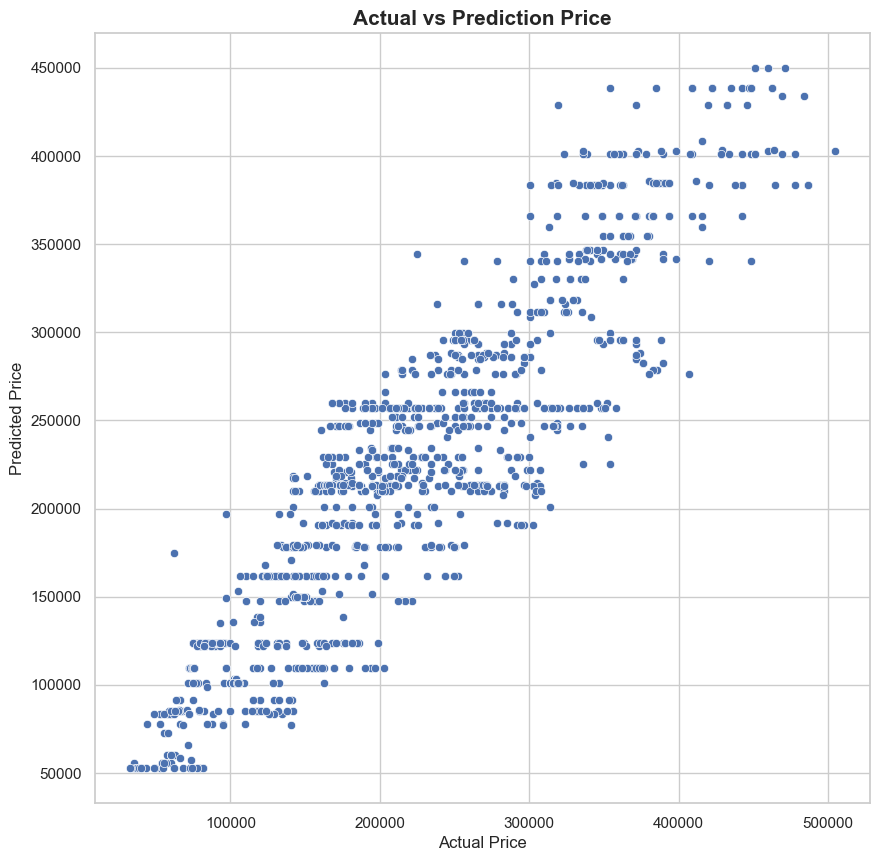

In [278]:
plt.figure (figsize= (10,10))

sns.scatterplot(x = y_test, y = y_pred_best_model)
plt.title('Actual vs Prediction Price', size=15, weight='bold')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

Berdasarkan perbandingan plot prediksi dan actual price diketahui bahwa prediksi yang dihasilkan sudah cukup dekat dengan nilai actual yang seharusnya. Meskipun tetap terdapat harga aktual yang rendah tapi diprediksi lebih tinggi (overestimation) dan juga sebaliknya (underestmation). Jika dilihat pada nilai MAPE yang dihasilkan yaitu sekitar 17,9% dan dapat dikategorikan bahwa 'kemampuan model peramalan baik' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

## **Feature Importance**

Untuk mengetahui masing-masing fitur dan derajat pengaruhnya terdahap target (Price(sqf)).

In [279]:
feature_imp = pd.DataFrame({
                            'Feature' : transformer.get_feature_names(),
                            'Importance' : best_model['model'].feature_importances_
                            }).sort_values(by = 'Importance', ascending = False)
feature_imp

,Feature,Importance
14,Size(sqf),0.396550
2,OneHot__x0_terraced,0.249640
12,YearBuilt,0.110471
11,N_Parkinglot(Basement),0.065724
13,N_FacilitiesInApt,0.048507
8,N_FacilitiesNearBy(ETC),0.029171
7,Ordinal__TimeToSubway,0.026841
9,N_FacilitiesNearBy(PublicOffice),0.026532
10,N_SchoolNearBy(University),0.011627
0,OneHot__x0_corridor,0.009792


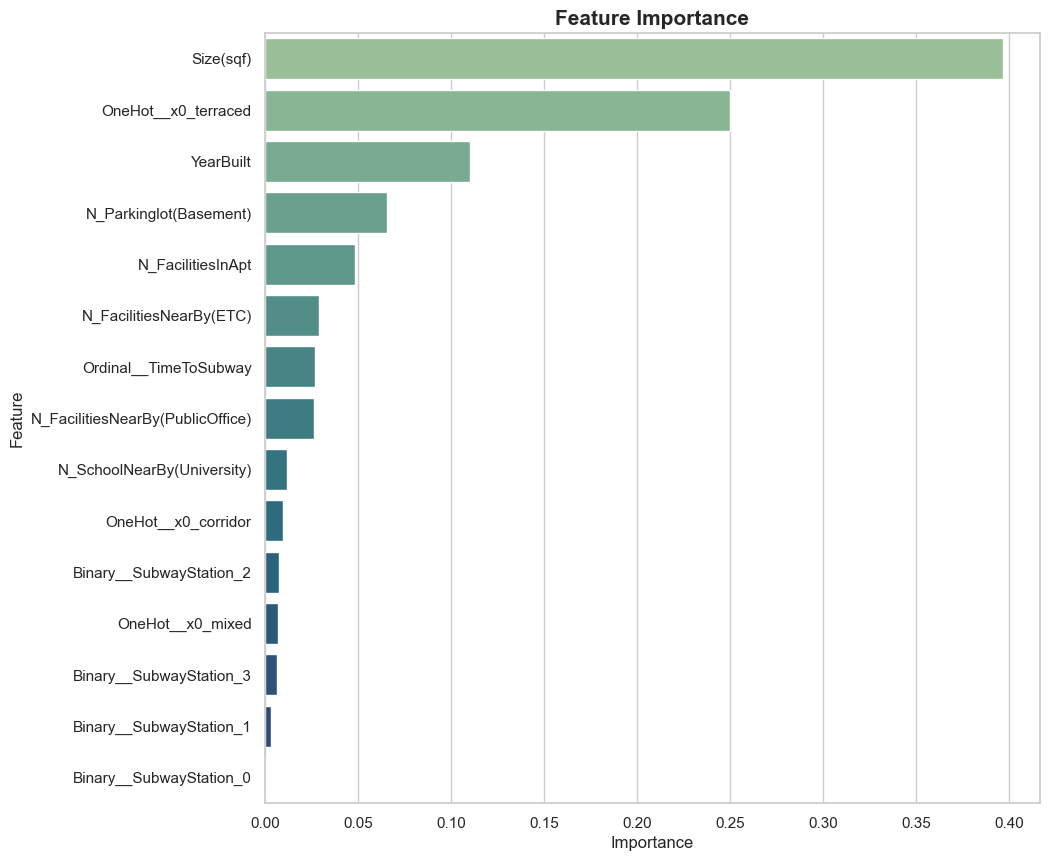

In [280]:
plt.figure(figsize= (10,10))

sns.barplot(data = feature_imp, x = 'Importance', y = 'Feature', palette = 'crest')
plt.title('Feature Importance', size=15, weight='bold')

plt.show()

## **Conclusion**

Berdasarkan pemodelan yang telah dilakukan, fitur 'year built', 'size(sqf)', dan 'hallway type' menjadi 3 fitur yang paling berpengaruh terhadap harga dari sebuah apartemen di Deagu.

Metrik evaluasi yang digunakan pada model ini adalah nilai RMSE, MAE, & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~17,8%, dapat disimpulkan bahwa jika nanti model yang dibuat ini digunakan untuk memperkirakan harga apartemen di Daegu pada rentang nilai seperti yang dilatih terhadap model (maksimal harga 585.840), maka perkiraan harga rata-rata akan meleset kurang lebih sebesar 18,5% dari harga seharusnya. Namun tidak menutup kemungkinan nilai prediksinya dapat meleset lebih dari nilai tersebut karena model masih memiliki bias yang cukup tinggi. Bias ini dihasilkan mungkin saja karena bisa jadi terdapat fitur lain yang berpengaruh namun belum masuk kepada data amatan.

## **Recommendations**

Terdapat beberapa hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Menambahkan fitur-fitur baru yang lebih korelatif dengan target (Sale Price), sebagai contoh jarak area perbelanjaan, jumlah tetangga, tingkat kriminalitas dan fitur-fitur lain yang mungkin dapat berpengaruh lebih lagi terhadap model. 

2. Jika fitur fitur baru telah ditambahkan dan juga menjadi lebih akurat, maka algoritma model yang lebih kompleks dapat digunakan guna dapat mengecilkan error.

3. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga apartement dari tahun ke tahun

In [274]:
# Save model
import pickle

# Final Model Random Forest
model = {'Random Forest': RandomForestRegressor(random_state=1),}

# Define model terhadap estimator terbaik
best_model = random_rf.best_estimator_

# Fitting model
best_model.fit(X_train, y_train)

# Prdict test set
y_pred_best_model = best_model.predict(X_test)

# Simpan nilai metrics RMSE setelah tuning
rmse_best_model =  np.sqrt(mean_squared_error(y_test, y_pred_best_model))
mae_best_model = mean_absolute_error(y_test, y_pred_best_model)
mape_best_model = mean_absolute_percentage_error(y_test, y_pred_best_model)

pickle.dump(best_model, open('Model_Apartment_Daegu_RF.sav', 'wb'))

In [275]:
# Load model
# filename = 'Model_Apartment_Daegu_RF.sav'
# loaded_model = pickle.load(open(filename, 'rb'))